In [1]:

%run ../load_magic/storage.py
%run ../load_magic/dataframes.py
%pprint
%who

Pretty printing has been turned OFF
FILEPATH_REGEX	 Path	 Storage	 URL_REGEX	 bs	 csv	 example_iterrows	 get_column_descriptions	 get_max_rsquared_adj	 
get_page_soup	 get_page_tables	 get_wiki_tables	 io	 math	 os	 pd	 pickle	 plt	 
random	 re	 sm	 sns	 stats	 sys	 urllib	 urlretrieve	 


In [2]:

import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, '../../rpc/py')
sys.path.insert(1, '../../rpc/rpc_env/Scripts')
sys.path.insert(1, r'C:\ffmpeg\bin')

In [3]:

%run ../load_magic/environment.py
import sermon_utils
u = sermon_utils.SermonScrapingUtilities()
s = u.s
notebook_path = get_notebook_path()
print(notebook_path)
print(['s.{}'.format(fn) for fn in dir(s) if not fn.startswith('_')])
print(['u.{}'.format(fn) for fn in dir(u) if not fn.startswith('_')])
[fn for fn in dir() if not fn.startswith('_')]

None
['s.attempt_to_pickle', 's.csv_exists', 's.data_csv_folder', 's.data_folder', 's.encoding_type', 's.load_csv', 's.load_dataframes', 's.load_object', 's.pickle_exists', 's.save_dataframes', 's.saves_csv_folder', 's.saves_folder', 's.saves_pickle_folder', 's.store_objects']
['u.SA_MONTHS_DICT', 'u.apply_audio_block_edit_squarespace', 'u.audio_xpath_list', 'u.b_months_list', 'u.button_xpath', 'u.calendar_squarespace_css_list', 'u.calendar_timer_squarespace_css_list', 'u.cancel_upload_window', 'u.change_am_pm_squarespace', 'u.check_for_audio', 'u.check_whether_its_already_on_sermonaudio', 'u.clear_search_bar_squarespace', 'u.click_audio_edit_button_squarespace', 'u.click_by_css', 'u.click_by_xpath', 'u.click_edit_selection_squarespace', 'u.click_external_file_subtab', 'u.click_first_search_result_squarespace', 'u.click_sunday_squarespace', 'u.click_the_add_new_speaker_button', 'u.click_the_close_signin_window_link', 'u.click_the_copyright_checkbox', 'u.click_the_create_new_sermon_butt

['Config', 'FILEPATH_REGEX', 'In', 'Out', 'Path', 'RandomForestClassifier', 'Storage', 'URL_REGEX', 'bs', 'csv', 'example_iterrows', 'exit', 'get_all_files_containing', 'get_classifier', 'get_column_descriptions', 'get_data_structs_dataframe', 'get_datastructure_prediction', 'get_dir_tree', 'get_importances', 'get_input_sample', 'get_ipython', 'get_max_rsquared_adj', 'get_module_version', 'get_modules_dataframe', 'get_notebook_path', 'get_page_soup', 'get_page_tables', 'get_struct_name', 'get_wiki_tables', 'io', 'ipykernel', 'json', 'jupyter_config_dir', 'math', 'notebook_path', 'notebookapp', 'np', 'os', 'pd', 'pickle', 'plt', 'preprocess_data', 'quit', 'random', 're', 's', 'sermon_utils', 'sm', 'sns', 'stats', 'subprocess', 'sys', 'u', 'urllib', 'urlretrieve']

In [4]:

from urllib.error import HTTPError
import sys

# Insert at 1, 0 is the script path (or '' in REPL)
sys.path.insert(1, osp.join('..', 'py'))

from storage import Storage
from stats_scraping_utils import StatsScrapingUtilities

s = Storage()
ssu = StatsScrapingUtilities(s=s)

tables_url = 'https://www.heritage.org/index/ranking'
driver = u.get_driver('FireFox')
page_tables_list = ssu.get_page_tables(tables_url, driver=driver, verbose=True)
driver.close()

Getting the FireFox driver
HTTP Error 403: Forbidden
[(0, (4, 9))]
[(0, (14, 9))]
[(0, (27, 9))]
[(0, (29, 9))]
[(0, (16, 9))]
[(0, (4, 9))]
[]


In [6]:

left_columns_list = ['Rank', 'Country', 'Overall', 'Change']
right_columns_list = ['rank', 'Country.1', 'Overall.1', 'Change.1']
capitalism_df = pd.DataFrame([], columns=left_columns_list)
for i in range(len(page_tables_list)):
    df = page_tables_list[i]
    left_df = df[left_columns_list].dropna(axis='index', how='all')
    right_df = df[right_columns_list].rename(columns={r: l for r, l in zip(right_columns_list, left_columns_list)}).dropna(axis='index',
                                                                                                                           how='all')
    capitalism_df = capitalism_df.append(left_df).append(right_df)
capitalism_df.shape

(0, 4)

In [8]:

if not capitalism_df.shape[0]:
    file_name = r'../data/html/capitalism_by_country.html'
    page_tables_list = ssu.get_page_tables(file_name, driver=driver, verbose=True)
    capitalism_df = page_tables_list[0].copy()
capitalism_df.columns = ['Rank', 'Country', 'Overall Capitalism', 'Change']
capitalism_df = capitalism_df.dropna(subset=['Overall Capitalism'])
capitalism_df.sample(10).T

No tables found


FileNotFoundError: [Errno 2] No such file or directory: '../data/html/capitalism_by_country.html'

In [141]:

mask_series = capitalism_df.duplicated(subset=['Country'], keep=False)
capitalism_df[mask_series].sort_values('Country')

,Rank,Country,Overall Capitalism,Change


In [142]:

# From https://en.wikipedia.org/wiki/List_of_countries_by_income_equality
# file_path = '../data/html/income_inequality_by_country.html'
# income_inequality_df = pd.read_html(file_path)[0]

# From https://t.co/OTtNsDtmwT (global-wealth-databook-2019.pdf, a Credit Suisse research report)
income_inequality_df = s.load_csv('Table_3-1_Wealth_pattern_within_countries_2019')
income_inequality_df.sample(10).T

,47,109,154,150,156,60,43,52,114,141
Country,Ecuador,Mozambique,Taiwan (Chinese Taipei),Suriname,Tanzania,Georgia,Czech Republic,Estonia,New Zealand,Slovakia
Adults (thousand),10_725,13_814,19_296,373,26_837,2_932,8_509,1_028,3_525,4_340
Mean wealth per adult (USD),19_144,880,210_525,6_089,3_069,12_609,64_663,78_458,304_124,66_171
Median wealth per adult (USD),6_399,352,70_191,1_562,1_282,5_226,20_854,24_915,116_437,40_432
Distribution of adults (%) by wealth range (USD) (under 10_000),62.9,99.3,15.4,90.2,95.7,70.0,23.3,23.5,9.3,0.0
Distribution of adults (%) by wealth range (USD) (10_000 - 100_000),34.7,0.7,43.5,9.1,4.1,28.7,66.9,61.0,36.8,83.2
Distribution of adults (%) by wealth range (USD) (100_000 – 1 million),2.2,0.0,38.3,0.7,0.1,1.2,9.3,14.8,48.8,16.6
Distribution of adults (%) by wealth range (USD) (over 1 million),0.1,0.0,2.7,0.0,0.0,0.0,0.5,0.7,5.2,0.2
Distribution of adults (%) by wealth range (USD) (Total),100,100,100,100,100,100,100,100,100,100
Gini (%),75.9,71.6,75.1,83.2,66.1,68.7,72.5,71.6,67.2,49.8


In [143]:

mask_series = income_inequality_df.duplicated(subset=['Country'], keep=False)
income_inequality_df[mask_series].sort_values('Country')

,Country,Adults (thousand),Mean wealth per adult (USD),Median wealth per adult (USD),Distribution of adults (%) by wealth range (USD) (under 10_000),Distribution of adults (%) by wealth range (USD) (10_000 - 100_000),Distribution of adults (%) by wealth range (USD) (100_000 – 1 million),Distribution of adults (%) by wealth range (USD) (over 1 million),Distribution of adults (%) by wealth range (USD) (Total),Gini (%)



----

In [144]:

capitalism_country_list = capitalism_df['Country'].tolist()
len(capitalism_country_list)

177

In [145]:

income_inequality_country_list = income_inequality_df['Country'].tolist()
len(income_inequality_country_list)

178

In [146]:

common_country_list = list(set.intersection(set(capitalism_country_list),
                                            set(income_inequality_country_list)))
len(common_country_list)

150

In [147]:

%run ../load_magic/lists.py
typos_df = check_for_typos(capitalism_country_list, income_inequality_country_list)
mask_series = (typos_df['max_similarity'] < 1.0)
typos_df[mask_series].sort_values('max_similarity', ascending=False).head()

,left_item,right_item,max_similarity
53,Saint Vincent and the Grenadines,St. Vincent and the Grenadines,0.935484
84,São Tomé and Príncipe,Sao Tome and Principe,0.857143
64,Saint Lucia,St. Lucia,0.800000
37,The Bahamas,Bahamas,0.777778
101,The Gambia,Gambia,0.750000


In [148]:

mask_series = (income_inequality_df['Country'] == 'St. Vincent and the Grenadines')
income_inequality_df.loc[mask_series, 'Country'] = 'Saint Vincent and the Grenadines'

In [149]:

mask_series = (capitalism_df['Country'] == 'São Tomé and Príncipe')
capitalism_df.loc[mask_series, 'Country'] = 'Sao Tome and Principe'

In [150]:

mask_series = (income_inequality_df['Country'] == 'St. Lucia')
income_inequality_df.loc[mask_series, 'Country'] = 'Saint Lucia'

In [151]:

mask_series = (capitalism_df['Country'] == 'The Bahamas')
capitalism_df.loc[mask_series, 'Country'] = 'Bahamas'

In [152]:

mask_series = (capitalism_df['Country'] == 'The Gambia')
capitalism_df.loc[mask_series, 'Country'] = 'Gambia'

In [153]:

mask_series = (capitalism_df['Country'] == 'Brunei Darussalam')
capitalism_df.loc[mask_series, 'Country'] = 'Brunei'

In [154]:

mask_series = (income_inequality_df['Country'] == 'Congo, Dem. Rep.')
income_inequality_df.loc[mask_series, 'Country'] = 'Democratic Republic of Congo'

In [155]:

mask_series = (income_inequality_df['Country'] == 'Congo, Rep.')
income_inequality_df.loc[mask_series, 'Country'] = 'Republic of Congo'

In [156]:

mask_series = (capitalism_df['Country'] == 'Kyrgyz Republic')
capitalism_df.loc[mask_series, 'Country'] = 'Kyrgyzstan'

In [157]:

mask_series = (capitalism_df['Country'] == 'Slovak Republic')
capitalism_df.loc[mask_series, 'Country'] = 'Slovakia'


----

In [74]:

[cn for cn in capitalism_country_list if 'slov' in str(cn).lower()]

['Slovenia', 'Slovak Republic']

In [75]:

[cn for cn in income_inequality_country_list if 'slov' in str(cn).lower()]

['Slovakia', 'Slovenia']

In [158]:

capitalism_country_list = capitalism_df['Country'].tolist()
income_inequality_country_list = income_inequality_df['Country'].tolist()
uncommon_country_list = list(set.symmetric_difference(set(capitalism_country_list),
                                                      set(income_inequality_country_list)))
sorted([str(cn) for cn in uncommon_country_list])

['Afghanistan', 'Africa', 'Antigua and Barbuda', 'Aruba', 'Asia-Pacific', 'Bhutan', 'Burma', 'Cabo Verde', 'Cuba', "Côte d'Ivoire", 'Dominican Republic', 'Eswatini', 'Europe', 'Grenada', 'Guatemala', 'Honduras', 'Hong Kong SAR', 'Iraq', 'Kiribati', 'Korea', 'Kosovo', 'Latin America', 'Libya', 'Micronesia', 'Myanmar', 'North America', 'North Korea', 'North Macedonia', 'South Korea', 'Syria', 'Taiwan', 'Taiwan (Chinese Taipei)', 'Uzbekistan', 'World', 'Yemen']

In [159]:

capitalism_country_list = capitalism_df['Country'].tolist()
income_inequality_country_list = income_inequality_df['Country'].tolist()
typos_df = check_for_typos(income_inequality_country_list, capitalism_country_list)
mask_series = (typos_df['max_similarity'] < 1.0)
typos_df[mask_series].sort_values('max_similarity', ascending=False).head()

,left_item,right_item,max_similarity
75,Iraq,Iran,0.750000
153,Syria,Serbia,0.727273
118,North America,South Africa,0.720000
10,Aruba,Cuba,0.666667
93,Libya,Liberia,0.666667


In [160]:

merge_df = pd.merge(left=capitalism_df, right=income_inequality_df, how='inner', on=['Country'],
                    suffixes=('_capitalism', '_income_inequality'))
merge_df.sample(10).T

,77,19,7,59,22,24,134,158,41,89
Rank,87,22.0,9,64,25.0,27.0,150,174,44,102
Country,Jordan,Austria,Finland,Kazakhstan,United States,Malta,Ethiopia,Sudan,Qatar,Gambia
Overall Capitalism,60.1,73.8,78.3,64.4,72.1,71.5,49.6,32.0,67.7,58.0
Change,-4.5,-0.1,2.2,-6.7,-2.7,1.3,-2.1,-7.1,-4.3,-0.8
Adults (thousand),5_512,7_092,4_341,12_147,245_140,349,52_970,20_474,2_223,969
Mean wealth per adult (USD),26_475,274_919,183_124,26_317,432_365,143_566,3_085,534,147_745,2_141
Median wealth per adult (USD),10_947,94_070,55_532,6_642,65_904,76_016,1_360,218,69_671,694
Distribution of adults (%) by wealth range (USD) (under 10_000),47.8,22.9,19.0,61.8,26.9,14.0,96.1,99.7,10.7,96.6
Distribution of adults (%) by wealth range (USD) (10_000 - 100_000),48.8,28.3,43.8,34.6,31.0,48.0,3.7,0.3,49.7,3.3
Distribution of adults (%) by wealth range (USD) (100_000 – 1 million),3.3,44.5,34.8,3.4,34.5,36.7,0.1,0.0,38.4,0.1


In [161]:

mask_series = merge_df.duplicated(subset=['Country'], keep=False)
merge_df[mask_series].sort_values('Country')

,Rank,Country,Overall Capitalism,Change,Adults (thousand),Mean wealth per adult (USD),Median wealth per adult (USD),Distribution of adults (%) by wealth range (USD) (under 10_000),Distribution of adults (%) by wealth range (USD) (10_000 - 100_000),Distribution of adults (%) by wealth range (USD) (100_000 – 1 million),Distribution of adults (%) by wealth range (USD) (over 1 million),Distribution of adults (%) by wealth range (USD) (Total),Gini (%)


In [162]:

# Explanatory variable
xname = 'Overall Capitalism'

# Response variable
yname = 'Gini (%)'

# Remove NaNs
columns_list = ['Country', xname, yname]
df = merge_df[columns_list].dropna()
xdata = df[xname]
ydata = df[yname]

In [1]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import textwrap

# Use the following only if you are on a high definition device
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

import seaborn as sns
import random
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x=xname, y=yname, scatter=True, data=df)
xlabel_str = 'Overall Capitalism (explanatory variable)'
xlabel_text = plt.xlabel(xlabel_str)
ylabel_str = 'Credit Suisse Gini % (response variable)'
ylabel_text = plt.ylabel(ylabel_str)
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_capitalist = xdata.min()
most_capitalist = xdata.max()
most_unequal = ydata.max()
least_unequal = ydata.min()
for label, x, y in zip(df['Country'], xdata, ydata):
    if (x == least_capitalist):
        annotation = plt.annotate('{} (least capitalist)'.format(label),
                                  xy=(x, y), xytext=(30, 10), **kwargs)
    elif (x == most_capitalist):
        annotation = plt.annotate('{} (most capitalist)'.format(label),
                                  xy=(x, y), xytext=(-115, 89), **kwargs)
    elif (y == most_unequal):
        annotation = plt.annotate('{} (most unequal)'.format(label),
                                  xy=(x, y), xytext=(-180, 0), **kwargs)
    elif (y == least_unequal):
        annotation = plt.annotate('{} (least unequal)'.format(label),
                                  xy=(x, y), xytext=(-180, 0), **kwargs)
    elif (label == 'United States'):
        annotation = plt.annotate('{} (most evil)'.format(label),
                                  xy=(x, y), xytext=(-75, 25), **kwargs)
title_str = '"The US has one of the highest levels of wealth inequality in '
title_str += 'the world and libertarians often point to the US as the country closest to free-market capitalism"'
wrapped_lines = textwrap.wrap(title_str, width=len(title_str)//3+5)
title_obj = fig1_fig.suptitle('\n'.join(wrapped_lines), fontsize=18)

C:\Users\daveb\AppData\Local\Temp\ipykernel_34892\1829422495.py:7: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats('retina')


NameError: name 'xname' is not defined

<Figure size 864x576 with 0 Axes>

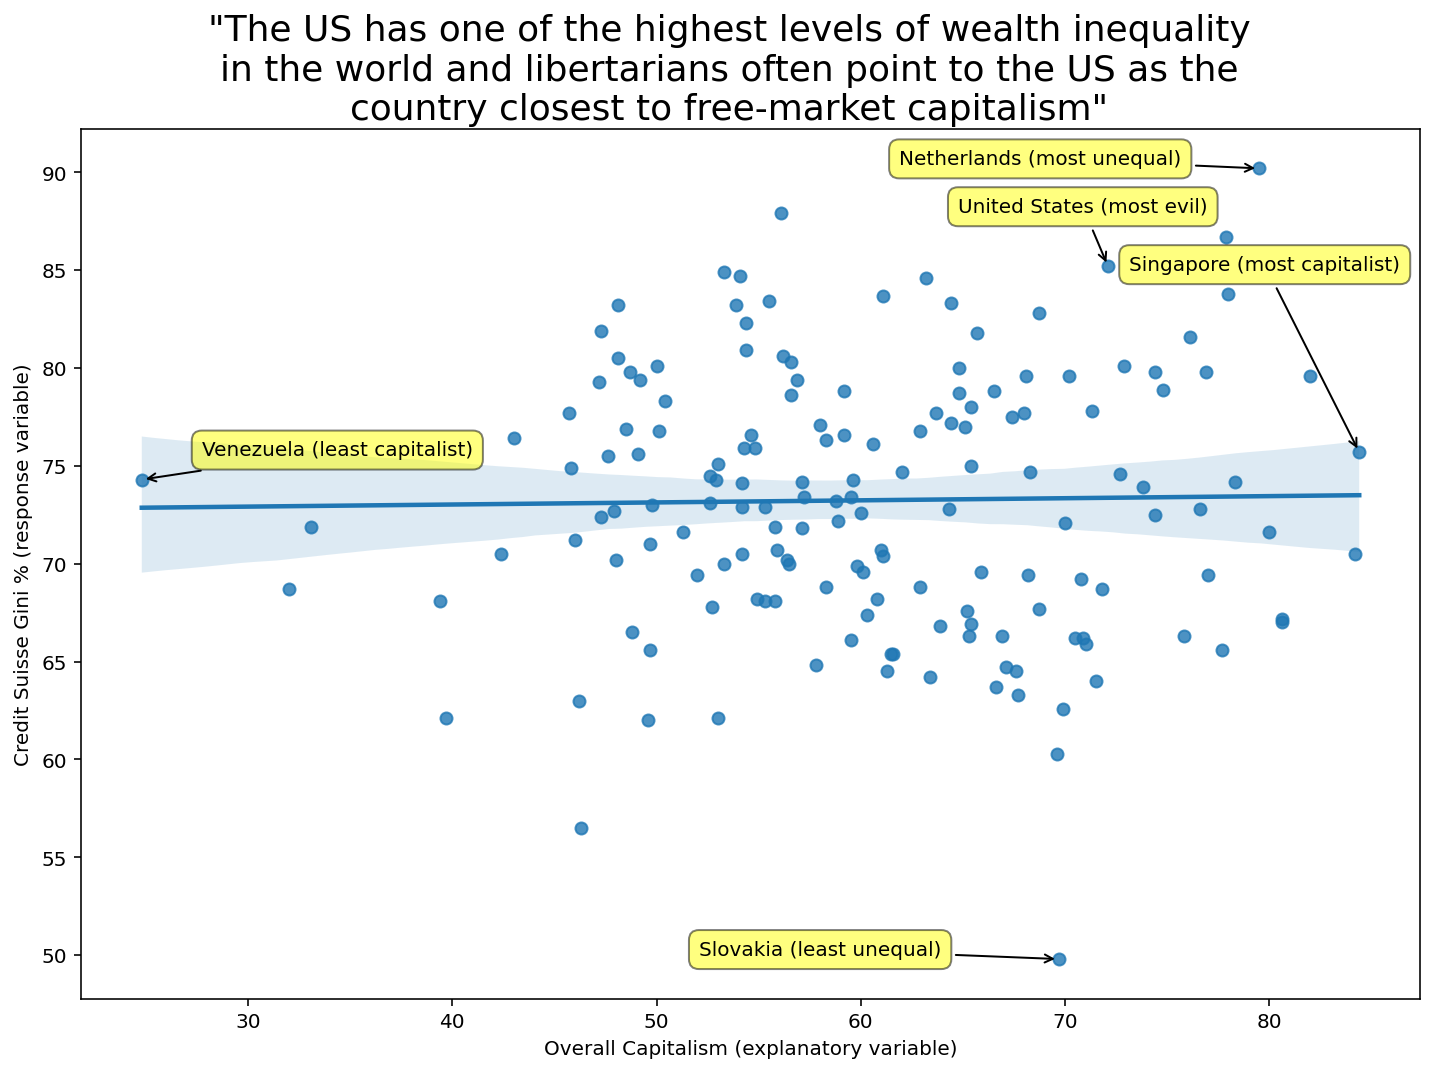

In [198]:

# First order (linear) scatterplot
import matplotlib.pyplot as plt
import textwrap

# Use the following only if you are on a high definition device
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

import seaborn as sns
import random
%matplotlib inline

fig1_fig = plt.figure(figsize=(12,8))
merge_axes_subplot = sns.regplot(x=xname, y=yname, scatter=True, data=df)
xlabel_str = 'Overall Capitalism (explanatory variable)'
xlabel_text = plt.xlabel(xlabel_str)
ylabel_str = 'Credit Suisse Gini % (response variable)'
ylabel_text = plt.ylabel(ylabel_str)
kwargs = dict(textcoords='offset points', ha='left', va='bottom',
              bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
              arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0'))
least_capitalist = xdata.min()
most_capitalist = xdata.max()
most_unequal = ydata.max()
least_unequal = ydata.min()
for label, x, y in zip(df['Country'], xdata, ydata):
    if (x == least_capitalist):
        annotation = plt.annotate('{} (least capitalist)'.format(label),
                                  xy=(x, y), xytext=(30, 10), **kwargs)
    elif (x == most_capitalist):
        annotation = plt.annotate('{} (most capitalist)'.format(label),
                                  xy=(x, y), xytext=(-115, 89), **kwargs)
    elif (y == most_unequal):
        annotation = plt.annotate('{} (most unequal)'.format(label),
                                  xy=(x, y), xytext=(-180, 0), **kwargs)
    elif (y == least_unequal):
        annotation = plt.annotate('{} (least unequal)'.format(label),
                                  xy=(x, y), xytext=(-180, 0), **kwargs)
    elif (label == 'United States'):
        annotation = plt.annotate('{} (most evil)'.format(label),
                                  xy=(x, y), xytext=(-75, 25), **kwargs)
title_str = '"The US has one of the highest levels of wealth inequality in '
title_str += 'the world and libertarians often point to the US as the country closest to free-market capitalism"'
wrapped_lines = textwrap.wrap(title_str, width=len(title_str)//3+5)
title_obj = fig1_fig.suptitle('\n'.join(wrapped_lines), fontsize=18)

In [197]:

wrapped_lines

['"The US has one of the highest levels of wealth inequality in the world and', 'libertarians often point to the US as the country closest to free-market capitalism"']

In [200]:

import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Use the following only if you are on a high definition device
from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')

from statsmodels.regression.quantile_regression import QuantReg

s.store_objects(capitalism_gini_df=merge_df)

Pickling to C:\Users\daveb\OneDrive\Documents\GitHub\StatsByCountry\saves\pickle\capitalism_gini_df.pickle



# Least Absolute Deviation

The LAD model is a special case of quantile regression where q=0.5

In [205]:

[re.sub(r'[^\d\w]+', ' ', x).strip().replace(' ', '_').lower() for x in merge_df.columns]

['rank', 'country', 'overall_capitalism', 'change', 'adults_thousand', 'mean_wealth_per_adult_usd', 'median_wealth_per_adult_usd', 'distribution_of_adults_by_wealth_range_usd_under_10_000', 'distribution_of_adults_by_wealth_range_usd_10_000_100_000', 'distribution_of_adults_by_wealth_range_usd_100_000_1_million', 'distribution_of_adults_by_wealth_range_usd_over_1_million', 'distribution_of_adults_by_wealth_range_usd_total', 'gini']

In [206]:

merge_df.columns = ['capitalism_rank', 'country_name', 'freedom_score', 'freedom_change', 'adults_thousand', 'mean_wealth_per_adult_usd',
                    'median_wealth_per_adult_usd', 'distribution_of_adults_by_wealth_range_usd_under_10_000',
                    'distribution_of_adults_by_wealth_range_usd_10_000_100_000', 'distribution_of_adults_by_wealth_range_usd_100_000_1_million',
                    'distribution_of_adults_by_wealth_range_usd_over_1_million', 'distribution_of_adults_by_wealth_range_usd_total', 'gini_percent']
explanatory_variable = 'freedom_score'
response_variable = 'gini_percent'
inequality_qr = smf.quantreg('{} ~ {}'.format(response_variable, explanatory_variable), merge_df)
inequality_rrw = inequality_qr.fit(q=.5)
print(inequality_rrw.summary())

                         QuantReg Regression Results                          
Dep. Variable:           gini_percent   Pseudo R-squared:            0.0001449
Model:                       QuantReg   Bandwidth:                       6.158
Method:                 Least Squares   Sparsity:                        19.60
Date:                Thu, 17 Feb 2022   No. Observations:                  160
Time:                        16:17:38   Df Residuals:                      158
                                        Df Model:                            1
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        73.7575      4.404     16.750      0.000      65.060      82.455
freedom_score    -0.0125      0.072     -0.174      0.862      -0.154       0.129



# Visualizing the results

We estimate the quantile regression model for many quantiles between .05 and .95, and compare best fit line from each of these models to Ordinary Least Squares results.

# Prepare data for plotting

For convenience, we place the quantile regression results in a Pandas DataFrame, and the OLS results in a dictionary.

In [207]:

quantiles_ndarray = np.arange(.05, .96, .1)
def fit_model(q):
    rrw = inequality_qr.fit(q=q)
    row_dict = {}
    row_dict['quantile'] = q
    row_dict['intercept'] = rrw.params['Intercept']
    row_dict['slope'] = rrw.params[explanatory_variable]
    conf_int_list = rrw.conf_int().loc[explanatory_variable].tolist()
    row_dict['lower_bound'] = conf_int_list[0]
    row_dict['upper_bound'] = conf_int_list[1]
    
    return row_dict
            
    
models_list = [fit_model(x) for x in quantiles_ndarray]

In [208]:

models_df = pd.DataFrame(models_list, columns=['quantile', 'intercept', 'slope', 'lower_bound',
                                               'upper_bound'])

rrw = smf.ols('{} ~ {}'.format(response_variable, explanatory_variable), merge_df).fit()
conf_int_list = rrw.conf_int().loc[explanatory_variable].tolist()
ols_dict = dict(intercept=rrw.params['Intercept'], slope=rrw.params[explanatory_variable],
           lower_bound=conf_int_list[0], upper_bound=conf_int_list[1])

print(ols_dict)
models_df

{'intercept': 72.5958371316845, 'slope': 0.010724898922028658, 'lower_bound': -0.08574335196481314, 'upper_bound': 0.10719314980887046}


,quantile,intercept,slope,lower_bound,upper_bound
0,0.05,59.738661,0.059480,-0.084148,0.203107
1,0.15,70.678902,-0.065454,-0.172745,0.041836
2,0.25,74.693412,-0.101796,-0.223986,0.020393
3,0.35,74.221041,-0.070122,-0.204693,0.064449
4,0.45,74.000450,-0.027149,-0.167885,0.113586
5,0.55,74.346354,-0.001869,-0.143398,0.139660
6,0.65,71.455553,0.084967,-0.054770,0.224705
7,0.75,72.490914,0.090909,-0.041296,0.223114
8,0.85,79.195029,0.012422,-0.114823,0.139668
9,0.95,75.223665,0.147321,-0.016773,0.311415



# First plot

This plot compares best fit lines for 10 quantile regression models to the least squares fit. We see that:

1. Wealth inequality decreases with freedom
2. The least squares estimates fit low inequality observations slightly poorly (i.e. the OLS line passes over low freedom countries)

In [209]:

mask_series = (merge_df[explanatory_variable] == merge_df[explanatory_variable].min())
mask_series = mask_series | (merge_df[explanatory_variable] == merge_df[explanatory_variable].max())
merge_df[mask_series].T

,0,159
capitalism_rank,1,176
country_name,Singapore,Venezuela
freedom_score,84.4,24.8
freedom_change,-5.3,0.1
adults_thousand,4_637,20_912
mean_wealth_per_adult_usd,297_873,1
median_wealth_per_adult_usd,96_967,0
distribution_of_adults_by_wealth_range_usd_under_10_000,14.0,100.0
distribution_of_adults_by_wealth_range_usd_10_000_100_000,36.6,0.0
distribution_of_adults_by_wealth_range_usd_100_000_1_million,44.9,0.0


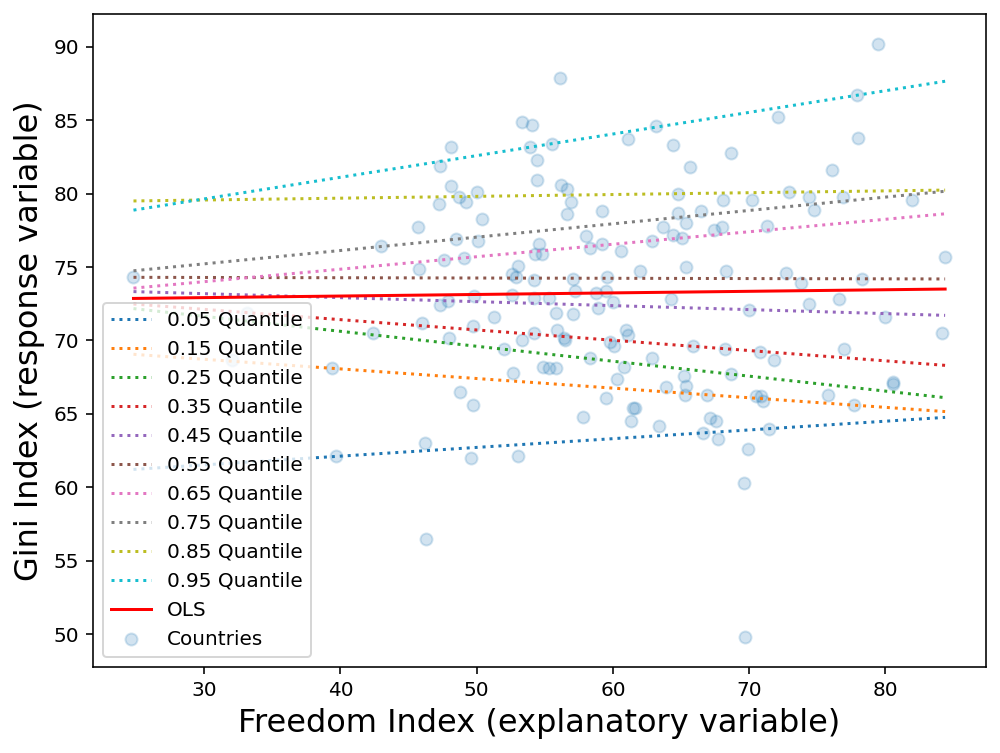

In [210]:

x = np.array([merge_df[explanatory_variable].min(), merge_df[explanatory_variable].max()])
get_y = lambda intercept, slope: intercept + slope * x

fig, ax = plt.subplots(figsize=(8, 6))

for i in range(models_df.shape[0]):
    y = get_y(models_df.loc[i, 'intercept'], models_df.loc[i, 'slope'])
    ax.plot(x, y, linestyle='dotted',
            label='{:.2} Quantile'.format(models_df.loc[i, 'quantile']))
    
y = get_y(ols_dict['intercept'], ols_dict['slope'])

ax.plot(x, y, color='red', label='OLS')
ax.scatter(merge_df[explanatory_variable], merge_df[response_variable], alpha=.2, label='Countries')
legend = ax.legend()
xlabel_text = ax.set_xlabel('Freedom Index (explanatory variable)', fontsize=16)
ylabel_text = ax.set_ylabel('Gini Index (response variable)', fontsize=16)


# Second plot

The dotted black lines form 95% point-wise confidence band around 10 quantile regression estimates (solid black line). The red lines represent OLS regression results along with their 95% confindence interval.

In only the low inequality observations do the quantile regression point estimates lie outside the OLS confidence interval, which suggests that the effect of freedom on inequality is mostly constant across the distribution.

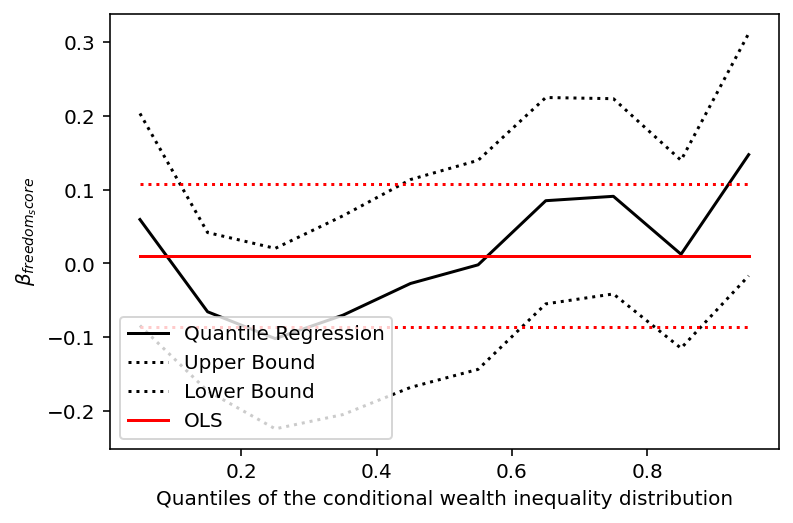

In [211]:

n = models_df.shape[0]
p1 = plt.plot(models_df['quantile'], models_df['slope'], color='black', label='Quantile Regression')
p2 = plt.plot(models_df['quantile'], models_df['upper_bound'], linestyle='dotted', color='black',
              label='Upper Bound')
p3 = plt.plot(models_df['quantile'], models_df['lower_bound'], linestyle='dotted', color='black',
              label='Lower Bound')

slope = ols_dict['slope']
p4 = plt.plot(models_df['quantile'], [slope] * n, color='red', label='OLS')

lower_bound = ols_dict['lower_bound']
p5 = plt.plot(models_df['quantile'], [lower_bound] * n, linestyle='dotted', color='red')

upper_bound = ols_dict['upper_bound']
p6 = plt.plot(models_df['quantile'], [upper_bound] * n, linestyle='dotted', color='red')

plt.ylabel(r'$\beta_{{{}}}$'.format(explanatory_variable))
plt.xlabel('Quantiles of the conditional wealth inequality distribution')
legend_obj = plt.legend(loc='lower left')